In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, auc, roc_curve
from sklearn import metrics

In [3]:
df=pd.read_excel("E:/python basics/Residency 3 Supervised learning project/Bank_Personal_Loan_Modelling.xlsx",sheetname='Bank_Personal_Loan_Modelling')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [4]:
df.head()

,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4.0,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3.0,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1.0,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1.0,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4.0,1.0,2,0,0,0,0,0,1


# Treat Missing Values and Outliers

In [47]:
df.fillna(0)
df.shape

(4397, 14)

In [6]:

q1 = df.iloc[:,1:9].quantile(0.25)
q3 = df.iloc[:,1:9].quantile(0.75)
iqr = q3 - q1
lower,upper = q1 - 1.5 * iqr,q3 + 1.5 * iqr
df = df[~((df < lower) | (df > upper)).any(axis=1)]
df.shape

(4397, 14)

## Understanding the Attributes.

In [7]:
df.corr()



,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.004076,-0.003036,-0.009937,-0.005933,-0.019631,-0.003841,0.024340,-0.017454,-0.021866,-0.019525,-0.008293,-0.007816,0.017305
Age (in years),-0.004076,1.000000,0.994115,-0.035687,-0.031874,-0.057667,-0.023693,0.034540,-0.007516,-0.015105,0.005714,0.005998,0.018465,0.010914
Experience (in years),-0.003036,0.994115,1.000000,-0.027902,-0.031188,-0.062783,-0.026331,0.006621,-0.006813,-0.011894,0.004318,0.008508,0.018138,0.012397
Income (in K/month),-0.009937,-0.035687,-0.027902,1.000000,-0.029612,-0.137056,0.518454,-0.148813,-0.056633,0.466310,0.001637,0.114763,0.004404,0.004647
ZIP Code,-0.005933,-0.031874,-0.031188,-0.029612,1.000000,0.022940,-0.018964,-0.015747,0.006339,0.000712,-0.003311,0.017669,0.038226,0.019836
Family members,-0.019631,-0.057667,-0.062783,-0.137056,0.022940,1.000000,-0.057964,0.022330,0.027043,0.013298,0.024710,0.000319,0.014295,-0.000391
CCAvg,-0.003841,-0.023693,-0.026331,0.518454,-0.018964,-0.057964,1.000000,-0.070466,-0.018283,0.328329,0.020348,0.082749,-0.021067,-0.001779
Education,0.024340,0.034540,0.006621,-0.148813,-0.015747,0.022330,-0.070466,1.000000,0.010710,0.097127,-0.015585,-0.006417,-0.024443,-0.017632
Mortgage,-0.017454,-0.007516,-0.006813,-0.056633,0.006339,0.027043,-0.018283,0.010710,1.000000,-0.027418,-0.009067,0.009611,-0.010274,-0.001704
Personal Loan,-0.021866,-0.015105,-0.011894,0.466310,0.000712,0.013298,0.328329,0.097127,-0.027418,1.000000,0.016958,0.245387,-0.015565,-0.005478


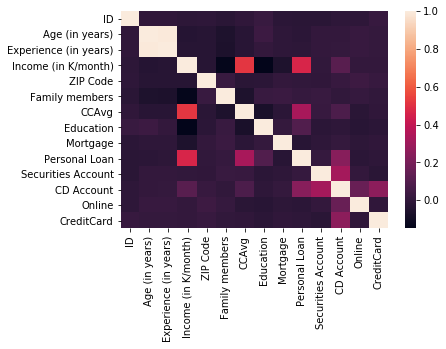

In [8]:
sns.heatmap(df.corr())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


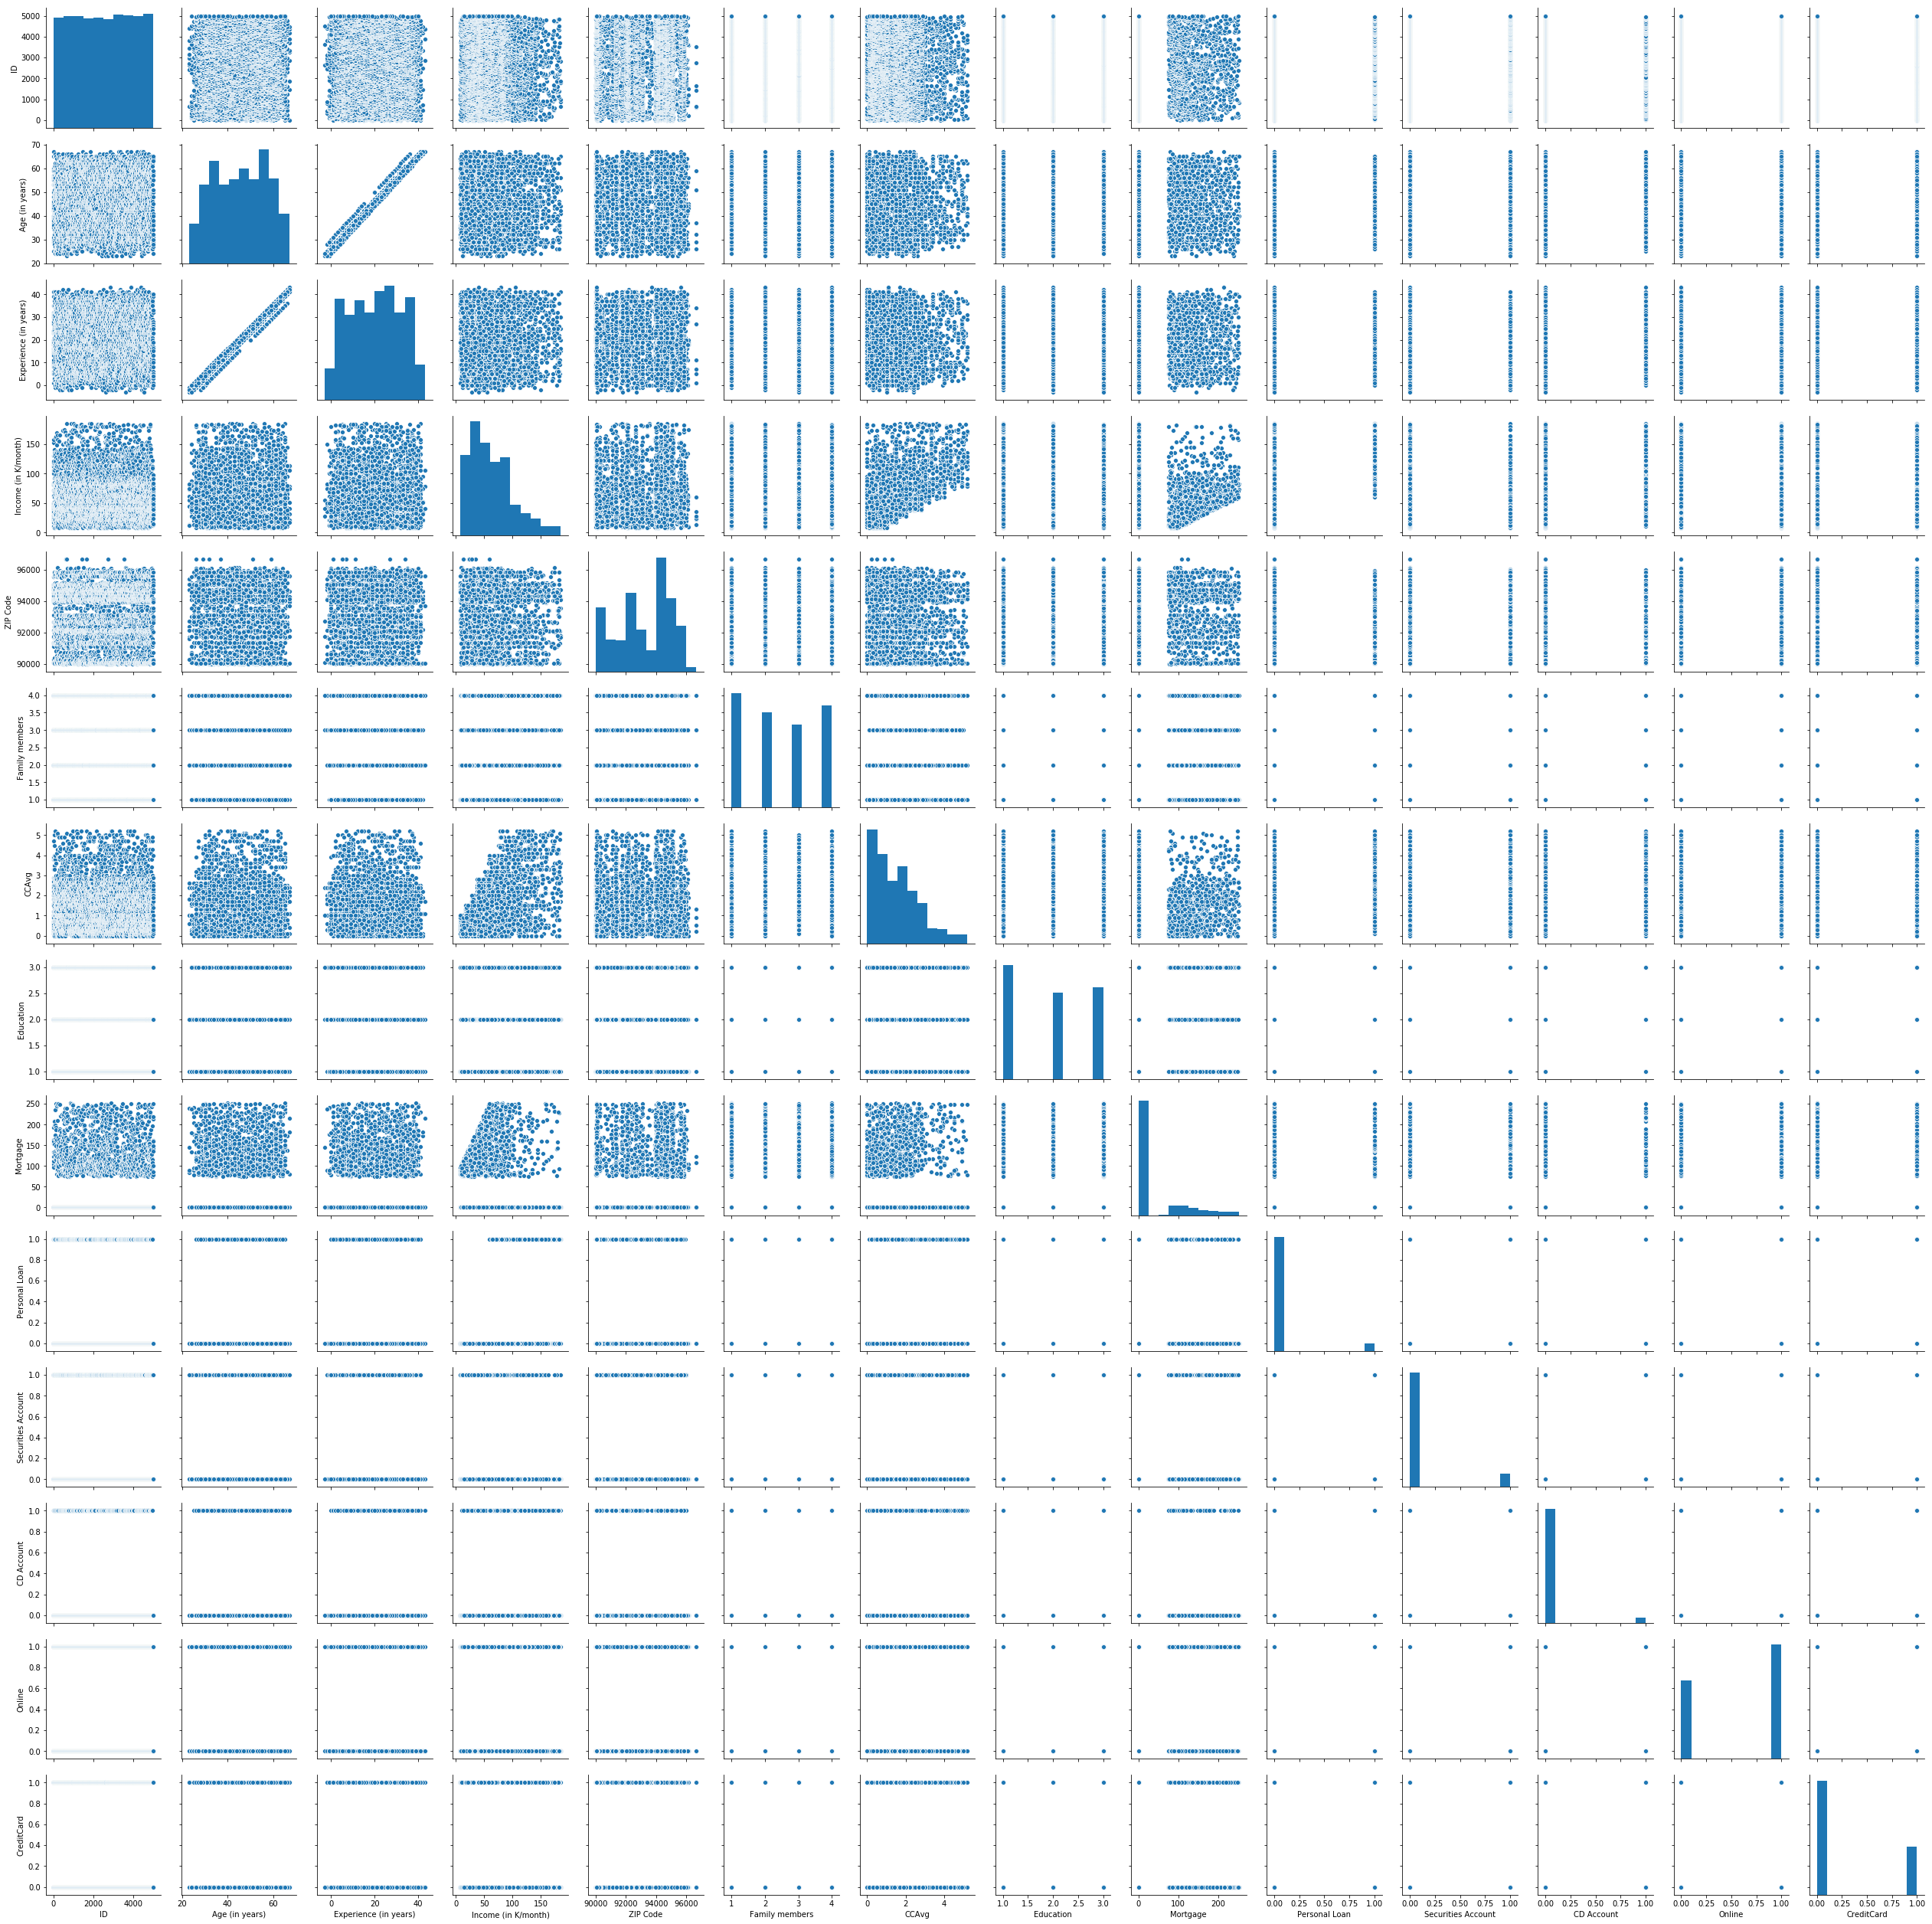

In [9]:
sns.pairplot(df)

In [10]:
X=df[['CD Account','CCAvg','Income (in K/month)','Education']]
#X=df.drop(['Personal Loan'],axis=1)
y=df[['Personal Loan']]

In [11]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [12]:
model= LogisticRegression()

In [13]:
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
y_pred = model.predict(X_test)

In [15]:
model.score(X_test,y_test)

0.9643939393939394

In [16]:
metrics.confusion_matrix(y_test, y_pred)

array([[1239,    8],
       [  39,   34]], dtype=int64)

#### True Positives (TP): we correctly predicted that they take personal Loan 34

#### True Negatives (TN): we correctly predicted that they don't take personal loan 1239

#### False Positives (FP): we incorrectly predicted that they do take personal loan (a "Type I error") 8 Falsely predict positive Type I error

#### False Negatives (FN): we incorrectly predicted that they don't take personal loan (a "Type II error") 39 Falsely predict negative Type II error

### KNN Model with different values of k

In [32]:
NNH = KNeighborsClassifier(n_neighbors= 5)

In [33]:
NNH.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [34]:
y_pred1=NNH.predict(X_test)

In [35]:
NNH.score(X_test,y_test)

0.9583333333333334

In [36]:
metrics.confusion_matrix(y_test, y_pred1)

array([[1240,    7],
       [  48,   25]], dtype=int64)

In [37]:
NNH = KNeighborsClassifier(n_neighbors= 8)

In [38]:
NNH.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [39]:
 y_pred1=NNH.predict(X_test)

In [40]:
NNH.score(X_test,y_test)

0.9590909090909091

In [41]:
metrics.confusion_matrix(y_test, y_pred1)

array([[1246,    1],
       [  53,   20]], dtype=int64)

In [42]:
NNH = KNeighborsClassifier(n_neighbors= 15)

In [43]:
NNH.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [44]:
 y_pred1=NNH.predict(X_test)

In [45]:
NNH.score(X_test,y_test)

0.9545454545454546

In [31]:
metrics.confusion_matrix(y_test, y_pred1)

array([[1237,   10],
       [  50,   23]], dtype=int64)

### Comparing accuracy of Logistic regression with KNN regression.
#### Logistic regression model gives more accurate score(96%) than KNN Model(approx. with different k value 95 %).
#### and moreover if we see the confusion matrix Logistic regression has good recall and presicion rate
#### than KNN Model.

### But the both model made TYPE 2 ERROR more. 
